In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [9]:
# Ensure 'mushroom.csv' is uploaded to your Colab environment
try:
    df = pd.read_csv('mushroom.csv')
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: mushroom.csv not found. Please upload the file.")

Dataset loaded successfully!


/tmp/ipython-input-3609625263.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


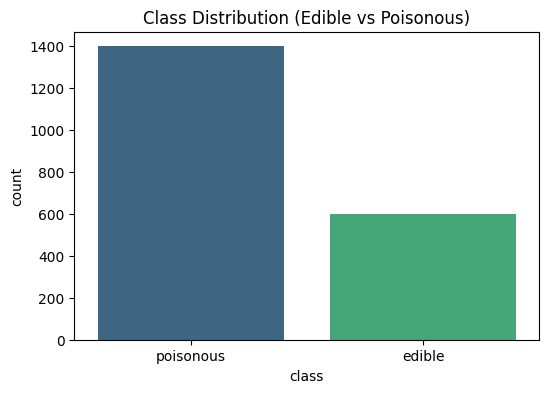

In [10]:
# Exploratory Data Analysis (EDA) & Visualization
# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Class Distribution (Edible vs Poisonous)')
plt.show()

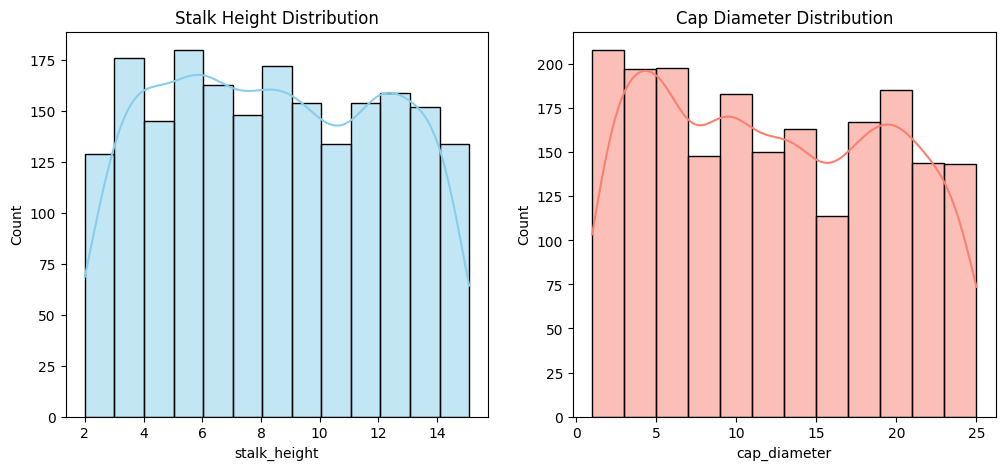

In [13]:
# Numerical Feature Distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['stalk_height'], kde=True, color='skyblue')
plt.title('Stalk Height Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['cap_diameter'], kde=True, color='salmon')
plt.title('Cap Diameter Distribution')
plt.show()

In [14]:
# Data Preprocessing
# Encode categorical variables
le = LabelEncoder()
df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df[col])

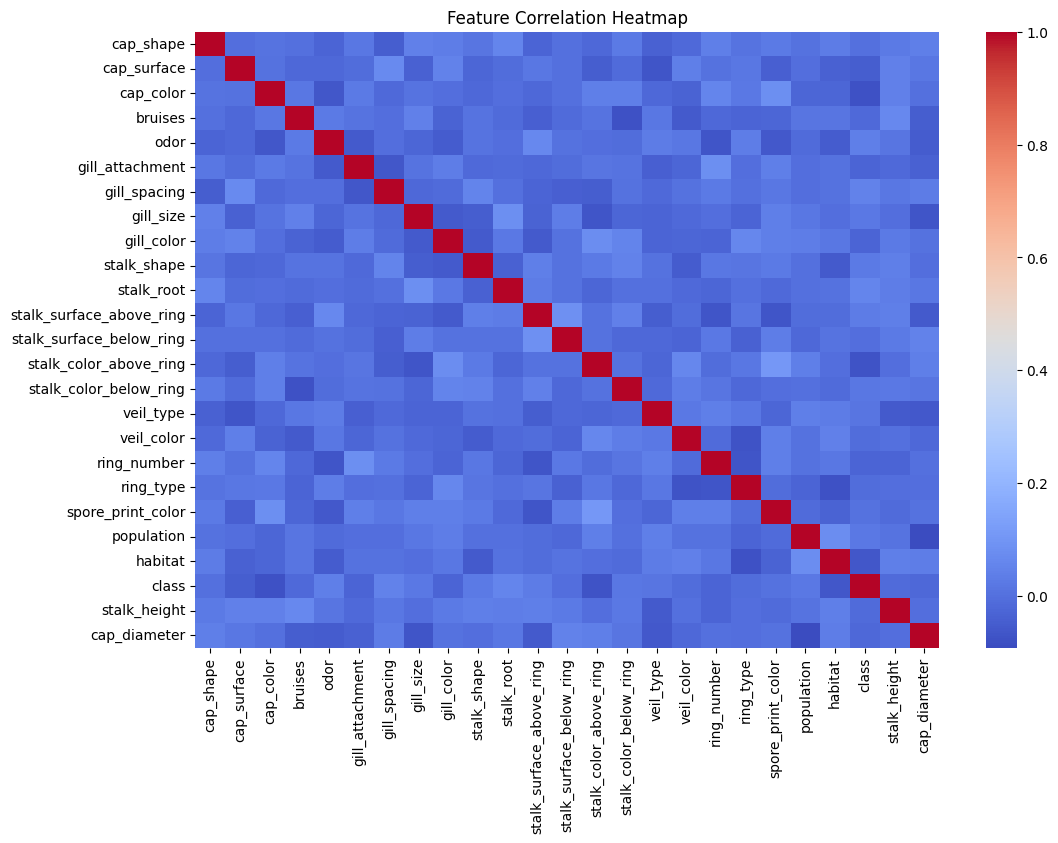

In [15]:
# Feature Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [16]:
# Split Features and Target
X = df_encoded.drop(columns=['class'])
y = df_encoded['class']

In [17]:
# Scaling (Crucial for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# 5. Task 4 & 7: SVM Implementation and Kernel Comparison
kernels = ['linear', 'poly', 'rbf']
comparison_results = []

In [20]:
for k in kernels:
    model = SVC(kernel=k, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    comparison_results.append({
        'Kernel': k,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

print("\n--- Kernel Performance Comparison ---")
print(pd.DataFrame(comparison_results))


--- Kernel Performance Comparison ---
   Kernel  Accuracy  Precision    Recall  F1-Score
0  linear    0.6675   0.667500  1.000000  0.800600
1    poly    0.8250   0.810726  0.962547  0.880137
2     rbf    0.7850   0.762319  0.985019  0.859477


In [24]:
# Parameter Tuning and Optimization
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 0.01]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)
print(f"Best Parameters (RBF): {grid.best_params_}")
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

Best Parameters (RBF): {'C': 1, 'gamma': 0.1}


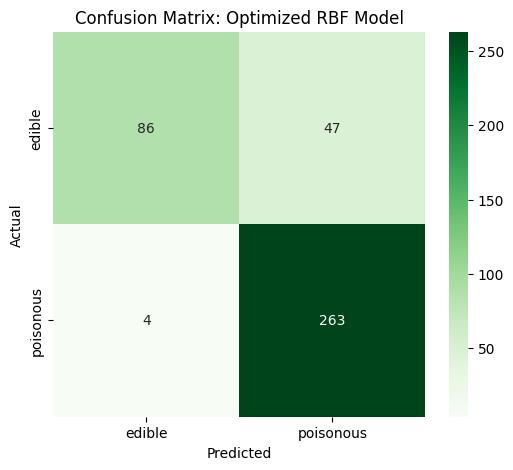


--- Final Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.65      0.77       133
           1       0.85      0.99      0.91       267

    accuracy                           0.87       400
   macro avg       0.90      0.82      0.84       400
weighted avg       0.88      0.87      0.86       400



In [25]:
# Visualization of Results
# Confusion Matrix for the Optimized Model
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Optimized RBF Model')
plt.show()

print("\n--- Final Classification Report ---")
print(classification_report(y_test, y_pred_best))